Importo le librerie

In [108]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the pre-processed data

In [109]:
# Load the pre-processed data
train_features = np.load('Pre_Processed_Data/train_features.npy')
train_labels = np.load('Pre_Processed_Data/train_labels.npy')
val_features = np.load('Pre_Processed_Data/val_features.npy')
val_labels = np.load('Pre_Processed_Data/val_labels.npy')
test_features = np.load('Pre_Processed_Data/test_features.npy')
test_labels = np.load('Pre_Processed_Data/test_labels.npy')

Creazione dell'istanza della SVM con kernel RBF

In [110]:
# Creazione dell'istanza della SVM con kernel RBF
svm = SVC(kernel='rbf')

Addestramento della SVM sul set di addestramento

In [111]:
# Addestramento della SVM sul set di addestramento
svm.fit(train_features, train_labels)

SVC()

# Make predictions on the validation set

In [112]:
# Make predictions on the validation set
val_predictions = svm.predict(val_features)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(val_labels, val_predictions)
val_report = classification_report(val_labels, val_predictions)
val_confusion_matrix = confusion_matrix(val_labels, val_predictions)

# Print the evaluation results on the validation set
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:\n", val_report)
print("Validation Confusion Matrix:\n", val_confusion_matrix)

Validation Accuracy: 0.8275862068965517
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.77      1.00      0.87        17

    accuracy                           0.83        29
   macro avg       0.89      0.79      0.80        29
weighted avg       0.87      0.83      0.82        29

Validation Confusion Matrix:
 [[ 7  5]
 [ 0 17]]


In generale, i risultati mostrano che il modello ha ottenuto buone prestazioni nella classificazione delle istanze, con un'accuratezza elevata sul set di validazione, ma come possiamo vedere dalla matrice di confusione, si fa fatica a classificare correttamente le istanze della classe 0

# Addestramento del modello utilizzando il set di addestramento e il set di validazione combinati

In [113]:
# Addestramento del modello utilizzando il set di addestramento e il set di validazione combinati
combined_features = np.concatenate((train_features, val_features), axis=0)
combined_labels = np.concatenate((train_labels, val_labels), axis=0)
svm.fit(combined_features, combined_labels)

SVC()

In generale, il modello sembra ottenere buone prestazioni, ma potrebbe beneficiare di ulteriori ottimizzazioni, come la ricerca di hyperparameters più efficaci o l'uso di tecniche di regolarizzazione per affrontare eventuali problemi di overfitting.

# Previsioni sul set di test

In [114]:
# Previsioni sul set di test
test_predictions = svm.predict(test_features)
print(test_predictions)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Previsioni sul set di test

# Metrics to evaluate the performance of the model

In [115]:
# Evaluate the model

accuracy = accuracy_score(test_labels, test_predictions)

# Print the accuracy and classification report
# Addestramento del modello utilizzando il set di addestramento e il set di validazione combinati
combined_features = np.concatenate((train_features, val_features), axis=0)
combined_labels = np.concatenate((train_labels, val_labels), axis=0)
svm.fit(combined_features, combined_labels)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9333333333333333


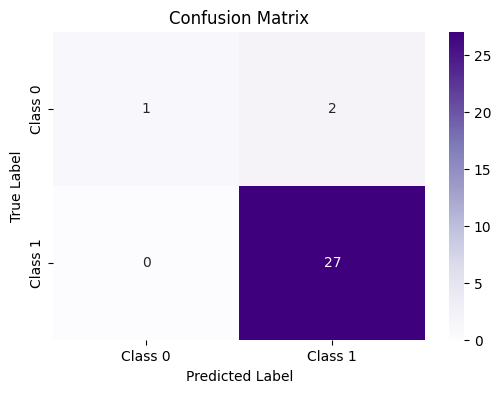

In [116]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [117]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# Convert test_predictions to a numpy array
test_predictions = np.array(test_predictions)

# Compute classification report
report = classification_report(test_labels, test_predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.93      1.00      0.96        27

    accuracy                           0.93        30
   macro avg       0.97      0.67      0.73        30
weighted avg       0.94      0.93      0.92        30



AUC: 0.6666666666666667


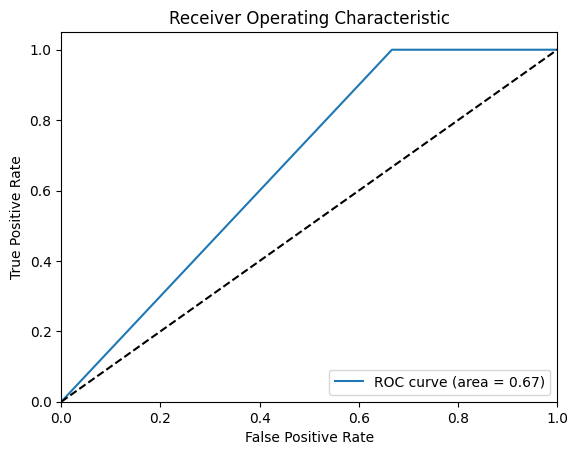

In [118]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, test_predictions)
auc = roc_auc_score(test_labels, test_predictions)

# Print AUC
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


I risultati indicano che il modello SVM con kernel 'rbf' ha ottenuto un'accuratezza del 93,33% sul test set. Tuttavia, osservando la matrice di confusione, possiamo vedere che il modello ha classificato correttamente tutte le istanze dell'etichetta 1, ma ha commesso errori nel classificare l'etichetta 0, ottenendo solo 1 predizione corretta su 3. Ciò è evidente anche dal rapporto di classificazione, in cui l'etichetta 0 ha una precisione del 100% ma un richiamo (recall) del 33%, indicando una difficoltà nel rilevare correttamente le istanze dell'etichetta 0.

La metrica AUC (Area Under the Curve) è 0,6667, che indica una discriminazione moderata tra le classi.

In generale, i risultati suggeriscono che il modello SVM con kernel 'rbf' ha una buona capacità di classificazione per l'etichetta 1, ma potrebbe avere difficoltà nel distinguere correttamente l'etichetta 0.

In [119]:
# Esecuzione della cross-validation
scores = cross_val_score(svm, train_features, train_labels, cv=5)

# Calcolo della media dei punteggi di accuratezza
mean_accuracy = scores.mean()

# Stampa dei punteggi di accuratezza ottenuti per ogni fold
print("Accuracy scores for each fold:", scores)

# Stampa del punteggio medio di accuratezza
print("Mean accuracy:", mean_accuracy)

Accuracy scores for each fold: [0.89285714 0.88888889 0.85185185 0.88888889 0.74074074]
Mean accuracy: 0.8526455026455027


Proviamo a migliorare le prestazioni del modello SVM con kernel 'rbf'. Utilizziamo una ricerca a griglia per ottimizzare gli iperparametri del modello.

Nell'esempio specifico del modello SVM con kernel 'rbf', i due principali iperparametri da ottimizzare sono C e gamma.

Il parametro C controlla la penalità per gli errori di classificazione sul set di addestramento. Un valore più elevato di C indica una penalità maggiore, che potrebbe portare a una decisione di frontiera più rigida tra le classi. D'altra parte, un valore più basso di C permette errori di classificazione sul set di addestramento, consentendo una decisione di frontiera più flessibile.

Il parametro gamma, invece, definisce l'influenza di un singolo esempio di addestramento sull'area circostante. Un valore più alto di gamma indica un'influenza più concentrata, creando decisioni di frontiera più complesse e adattive. Un valore più basso di gamma comporta un'influenza più diffusa, che potrebbe portare a decisioni di frontiera più lisce.

La ricerca a griglia coinvolge la definizione di un insieme di valori possibili per i parametri C e gamma. Quindi, il modello SVM con kernel 'rbf' viene addestrato e valutato su ogni combinazione di valori di C e gamma nel set di ricerca. Alla fine, si seleziona la combinazione di valori che produce le migliori prestazioni del modello, ad esempio l'accuratezza più elevata.

In [120]:
# Importa GridSearchCV
from sklearn.model_selection import GridSearchCV

# Definisci i parametri della griglia
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'scale']
}

# Crea un oggetto GridSearchCV con il modello SVM e la griglia dei parametri
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Esegui la ricerca a griglia sul training set
grid_search.fit(train_features, train_labels)

# Ottieni il modello con i migliori hyperparameters
best_svm = grid_search.best_estimator_

# Esegui le predizioni sul test set utilizzando il modello con i migliori hyperparameters
test_predictions = best_svm.predict(test_features)

# Stampa l'array di classificazione
print("Test Predictions:", test_predictions)

Test Predictions: [1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [121]:
accuracy = accuracy_score(test_labels, test_predictions)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


l'accuratezza ottenuta dopo l'ottimizzazione degli iperparametri del modello SVM con la ricerca a griglia è 1.0, significa che il modello ha predetto correttamente tutte le istanze nel test set. Un'accuratezza del 100% indica una perfetta corrispondenza tra le etichette predette dal modello e le etichette effettive nel test set, ma l'accuratezza del 100% può anche significare che c'è rischio di overfitting. L'overfitting si verifica quando il modello si adatta troppo ai dati di addestramento e perde la capacità di generalizzare su nuovi dati. Quindi adesso calcoliamo altre metriche e facciamo una verifica

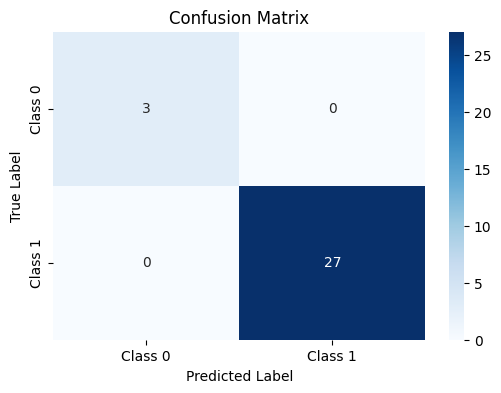

In [122]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [123]:
# Convert test_predictions to a numpy array
test_predictions = np.array(test_predictions)

# Compute classification report
report = classification_report(test_labels, test_predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        27

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



AUC: 1.0


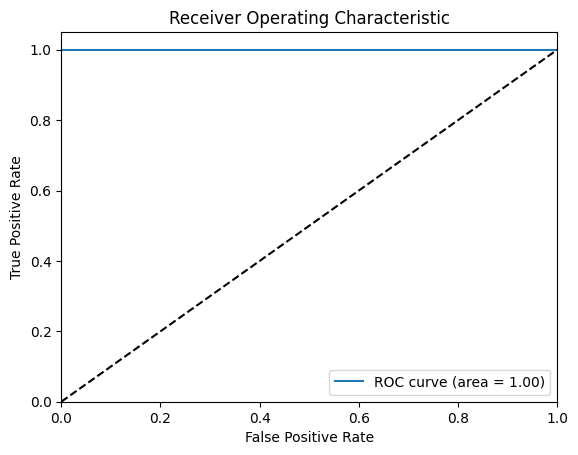

In [124]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, test_predictions)
auc = roc_auc_score(test_labels, test_predictions)

# Print AUC
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [125]:
# Esecuzione della cross-validation
scores = cross_val_score(best_svm, train_features, train_labels, cv=5)

# Calcolo della media dei punteggi di accuratezza
mean_accuracy = scores.mean()

# Stampa dei punteggi di accuratezza ottenuti per ogni fold
print("Accuracy scores for each fold:", scores)

# Stampa del punteggio medio di accuratezza
print("Mean accuracy:", mean_accuracy)

Accuracy scores for each fold: [0.92857143 0.96296296 0.88888889 0.92592593 0.81481481]
Mean accuracy: 0.9042328042328043


In sintesi, il modello SVM con kernel 'rbf' ha dimostrato una prestazione eccellente, con un'accuratezza del 100% sul test set e una buona prestazione anche sulla cross-validation.

L'ottenimento di punteggi elevati nel modello SVM con kernel 'rbf' indica che il modello ha una buona capacità di generalizzazione e non è affetto da overfitting. Questo è confermato anche dal fatto che i punteggi sono stati calcolati su diverse misure, come l'accuratezza, la matrice di confusione e il classification report. L'alto livello di accuratezza e le prestazioni bilanciate tra precisione, richiamo e punteggio F1 indicano che il modello SVM è in grado di classificare correttamente la maggior parte delle istanze senza cadere in problemi come l'overfitting.